*******************************

Matthew Werner<br>
Dat 514 - Machine Learning<br>
Titanic Dataset Analysis

***************************

# Objectives:
**1.Data Cleaning and Preparation.**<br>
> Properly handling NAs.<br>
> Binning continuous variables to represent different groups of passengers.<br>
> One hot encoding to increase model efficiency.<br>

**2. Build multiple classification models.**<br>
> Neural Net, Nearest Neighbor, Decision Tree, and Random Forest.<br>


**3.Determine:**<br>
>Which model is best suited for predicting survival rate.<br>
>Which variables have the highest influence on survival rate.

**4. Analysis:**<br>
> Draw interesting conclusions from in-depth creative analysis.

# Importing Necessary Packages

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Importing the Titanic Dataset

In [2]:
train_df = pd.read_csv('C:/Users/matth/OneDrive/Documents/Grad School/Data Analytics/Spring 2023/Machine Learning/Kaggle Competition - Titanic/titanic/train.csv')
test_df = pd.read_csv('C:/Users/matth/OneDrive/Documents/Grad School/Data Analytics/Spring 2023/Machine Learning/Kaggle Competition - Titanic/titanic/test.csv')
combine = [train_df, test_df]

# Data Exploration

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Exploring which columns have null values
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Finding features that contain strings.
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
# Finding percent survived in each ticket class.
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
# Finding percent survived by sex.
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# Finding percent survived by number of siblings/spouses aboard.
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# Finding percent survived by number of parents/children aboard.
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Data Visualizations

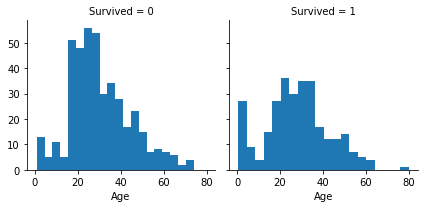

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


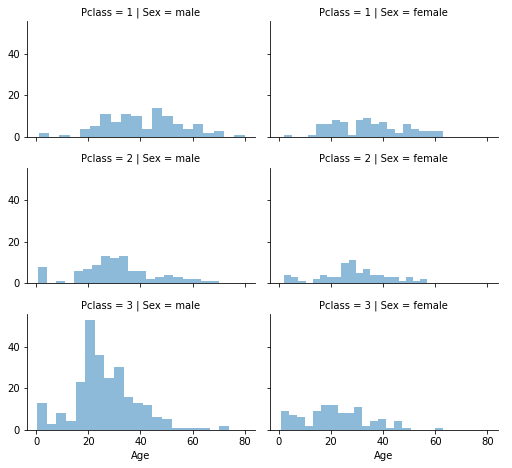

In [14]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


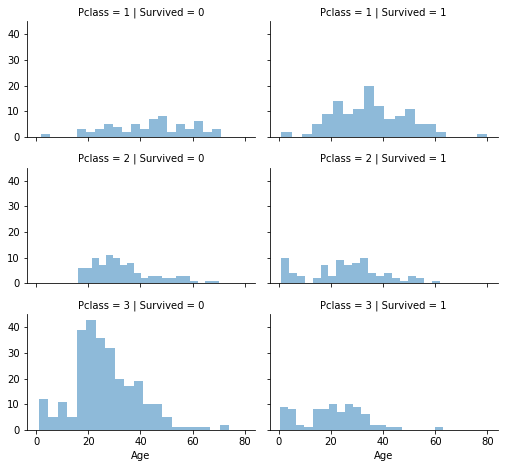

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


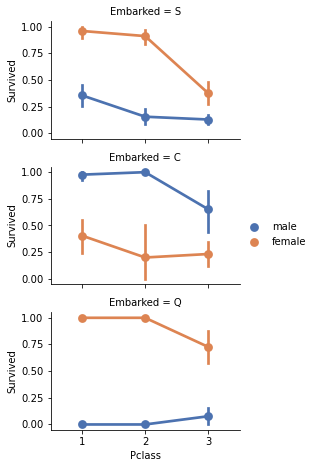

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\matth\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


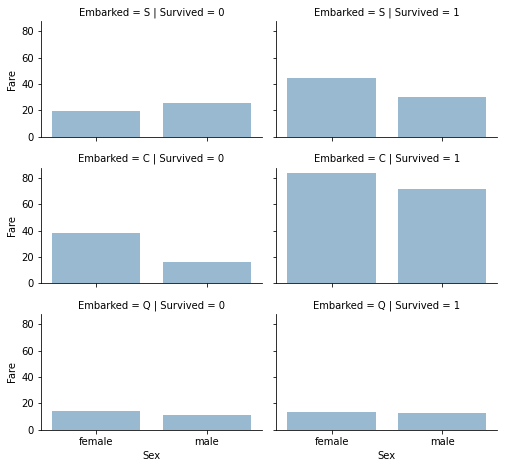

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Data Cleaning and Preparation

In [18]:
# Removing "Ticket" feature because its value is arbitrary.
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

### One Hot Encoding the Variable, "Cabin".

In [19]:
# Extracting letter from "Cabin" feature using regex. 
# This value may help us improve our model by further differentiating the "Passeger Class" variable.
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df['Cabin'] = train_df['Cabin'].str.extract(r'([A-Za-z])', expand=False)
test_df['Cabin'] = test_df['Cabin'].str.extract(r'([A-Za-z])', expand=False)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 11) (418, 10) (891, 11) (418, 10)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [20]:
# One hot encoding "Cabin"
dummy_cabin_train = pd.get_dummies(train_df['Cabin'], prefix = 'Cabin')
dummy_cabin_test = pd.get_dummies(test_df['Cabin'], prefix = 'Cabin')

In [21]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_cabin_train)
test_df = test_df.join(dummy_cabin_test)

In [22]:
# Drop initial "Cabin" column from both datasets.
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)
combine = [train_df, test_df]

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0


### Creating and One Hot Encoding the Variable, "Title".

In [24]:
# Extracting different title names from the "name" column.
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [25]:
# Replacing uncommon title names with "Rare"
# Correcting female title names
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [26]:
# One hot encoding "Title"
dummy_title_train = pd.get_dummies(train_df['Title'], prefix = 'Title')
dummy_title_test = pd.get_dummies(test_df['Title'], prefix = 'Title')

In [27]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_title_train)
test_df = test_df.join(dummy_title_test)

In [28]:
# Drop initial "Title" column from both datasets.
train_df = train_df.drop(['Title'], axis = 1)
test_df = test_df.drop(['Title'], axis = 1)

In [29]:
# Removing unnecessary columns "Name" and "PassengerId".
# Keep PassengerId in test_df for final export to csv.
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

# Making sure number of rows are still the same
train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

((891, 21), (418, 20), (891, 21), (418, 20))

### One Hot Encoding the Variable, "Pclass".

In [30]:
# One hot encode Pclass

dummy_Pclass_train = pd.get_dummies(train_df['Pclass'], prefix = 'Pclass')
dummy_Pclass_test = pd.get_dummies(test_df['Pclass'], prefix = 'Pclass')

In [31]:
# Join one hot encoded variables to their respective dataset.

train_df = train_df.join(dummy_Pclass_train)
test_df = test_df.join(dummy_Pclass_test)

In [32]:
# Drop initial "Pclass" column from both datasets.

train_df = train_df.drop(['Pclass'], axis = 1)
test_df = test_df.drop(['Pclass'], axis = 1)
combine = [train_df, test_df]

### One Hot Encoding the variable, "Sex".

In [33]:
# One hot encoding sex.
dummy_sex_train = pd.get_dummies(train_df['Sex'], prefix = 'Sex')
dummy_sex_test = pd.get_dummies(test_df['Sex'], prefix = 'Sex')

In [34]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_sex_train)
test_df = test_df.join(dummy_sex_test)

In [35]:
train_df = train_df.drop(['Sex'], axis = 1)
test_df = test_df.drop(['Sex'], axis = 1)
combine = [train_df, test_df]

In [36]:
# Check to make sure rows are still lined up
train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

((891, 24), (418, 23), (891, 24), (418, 23))

### Handling NA's for Age

In [37]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,S,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,S,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,S,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,0,35.0,0,0,8.0500,S,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [38]:
# Number of NAs for "Age".
train_df['Age'].isnull().sum()

177

In [39]:
# Replacing NAs with median value.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [40]:
# Making sure all NAs are handled.
train_df['Age'].isnull().sum()

0

In [41]:
combine = [train_df, test_df]

### Analyzing Age

In [42]:
# Making age groups.
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [43]:
# Integer encoding our 'Age' bins.
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,AgeBand
0,0,1.0,1,0,7.2500,S,0,0,0,0,...,0,1,0,0,0,0,1,0,1,"(16.336, 32.252]"
1,1,2.0,1,0,71.2833,C,0,0,1,0,...,0,0,1,0,1,0,0,1,0,"(32.252, 48.168]"
2,1,1.0,0,0,7.9250,S,0,0,0,0,...,1,0,0,0,0,0,1,1,0,"(16.336, 32.252]"
3,1,2.0,1,0,53.1000,S,0,0,1,0,...,0,0,1,0,1,0,0,1,0,"(32.252, 48.168]"
4,0,2.0,0,0,8.0500,S,0,0,0,0,...,0,1,0,0,0,0,1,0,1,"(32.252, 48.168]"


In [44]:
# One hot encoding age bins.
dummy_age_train = pd.get_dummies(train_df['Age'], prefix = 'Age')
dummy_age_test = pd.get_dummies(test_df['Age'], prefix = 'Age')

In [45]:
# Joining dummy variables to original datasets.
train_df = train_df.join(dummy_age_train)
test_df = test_df.join(dummy_age_test)

In [46]:
# Drop "AgeBand" and "Age" columns.
train_df = train_df.drop(['AgeBand', 'Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0
0,0,1,0,7.2500,S,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,1,1,0,71.2833,C,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,7.9250,S,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,1,1,0,53.1000,S,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,8.0500,S,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


### Family Size Analysis and Preparation

In [47]:
# Making "FamilySize" column by combining siblings/spouses/parents/children, plus themselves.
# Finding percentage of survival based on family size.
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [48]:
# Finding who is onboard alone and their survival percentage.
for dataset in combine:
    dataset['IsAlone'] = 'No'
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 'Yes'

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,No,0.505650
1,Yes,0.303538


### One Hot Encoding the Variable, "IsAlone".

In [49]:
# One hot encoding
dummy_IsAlone_train = pd.get_dummies(train_df['IsAlone'], prefix = 'IsAlone')
dummy_IsAlone_test = pd.get_dummies(test_df['IsAlone'], prefix = 'IsAlone')

In [50]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_IsAlone_train)
test_df = test_df.join(dummy_IsAlone_test)

In [51]:
# Removing the "IsAlone" column that contains integers.
train_df = train_df.drop(['IsAlone'], axis = 1)
test_df = test_df.drop(['IsAlone'], axis = 1)

### One Hot Encoding the Variable, "Family Size".

In [52]:
# One hot encoding
dummy_FamilySize_train = pd.get_dummies(train_df['FamilySize'], prefix = 'FamilySize')
dummy_FamilySize_test = pd.get_dummies(test_df['FamilySize'], prefix = 'FamilySize')

In [53]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_FamilySize_train)
test_df = test_df.join(dummy_FamilySize_test)

In [54]:
# Removing the "FamilySize" column.
train_df = train_df.drop(['FamilySize'], axis = 1)
test_df = test_df.drop(['FamilySize'], axis = 1)

In [55]:
# Removing additional redundant columns.
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,IsAlone_Yes,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,0,7.2500,S,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,71.2833,C,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,7.9250,S,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,53.1000,S,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,8.0500,S,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


### Handling NAs and One Hot Encoding the Variable, "Embarked"

In [56]:
# Most frequently embarked from where?
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [57]:
# Fill NAs with most frequently embarked location.

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

# Survival percentage by embarkment
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [58]:
# One hot encoding
dummy_embarked_train = pd.get_dummies(train_df['Embarked'], prefix = 'Embarked')
dummy_embarked_test = pd.get_dummies(test_df['Embarked'], prefix = 'Embarked')

In [59]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_embarked_train)
test_df = test_df.join(dummy_embarked_test)

In [60]:
# Removing the "FamilySize" column.
train_df = train_df.drop(['Embarked'], axis = 1)
test_df = test_df.drop(['Embarked'], axis = 1)

### Handling the NA for "Fare" in the Test dataset

In [61]:
# Impute histogram gradient descent or random forest/missing forest
# Replacing NAs in "Fare" with median Fare.
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Title_Master,...,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Embarked_C,Embarked_Q,Embarked_S
0,892,7.8292,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,7.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,9.6875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,8.6625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,12.2875,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [62]:
# Creating groups for Fare prices.
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
combine = [train_df, test_df]

In [63]:
# Integer encoding our 'FareBand' bins.
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,...,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
# One hot encoding fare bins
dummy_fare_train = pd.get_dummies(train_df['Fare'], prefix = 'Fare')
dummy_fare_test = pd.get_dummies(test_df['Fare'], prefix = 'Fare')

In [65]:
# Join one hot encoded variables to their respective dataset.
train_df = train_df.join(dummy_fare_train)
test_df = test_df.join(dummy_fare_test)

In [66]:
# Removing the "Fare" column.
train_df = train_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)

In [67]:
train_df = train_df.drop(['Cabin_T'], axis = 1)

In [68]:
train_df.columns

Index(['Survived', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Age_0.0', 'Age_1.0', 'Age_2.0', 'Age_3.0',
       'Age_4.0', 'IsAlone_No', 'IsAlone_Yes', 'FamilySize_1', 'FamilySize_2',
       'FamilySize_3', 'FamilySize_4', 'FamilySize_5', 'FamilySize_6',
       'FamilySize_7', 'FamilySize_8', 'FamilySize_11', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3'],
      dtype='object')

In [69]:
test_df.columns

Index(['PassengerId', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Age_0.0', 'Age_1.0', 'Age_2.0', 'Age_3.0',
       'Age_4.0', 'IsAlone_No', 'IsAlone_Yes', 'FamilySize_1', 'FamilySize_2',
       'FamilySize_3', 'FamilySize_4', 'FamilySize_5', 'FamilySize_6',
       'FamilySize_7', 'FamilySize_8', 'FamilySize_11', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3'],
      dtype='object')

# Neural Net Classifier

In [70]:
# Basic nearual net using sklearn
# Setting test and train datasets.
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 40), (891,), (418, 40))

In [71]:
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20, 10, 5), verbose=False, warm_start=False)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 5), max_iter=500,
              random_state=1)

In [72]:
y_pred_clf=clf.predict(X_test)

In [73]:
acc_nn = round(clf.score(X_train, y_train) * 100, 2)
print(acc_nn)

90.35


# Permutation

In [74]:
features = X_train.columns

In [75]:
import eli5
from eli5.sklearn import PermutationImportance

In [76]:
perm = PermutationImportance(clf, random_state=1).fit(X_train, y_train)

In [77]:
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.1464 ± 0.0119,Title_Mr
0.0393 ± 0.0094,Pclass_3
0.0350 ± 0.0059,Pclass_1
0.0341 ± 0.0067,Sex_female
0.0308 ± 0.0073,Fare_0
0.0274 ± 0.0023,Sex_male
0.0254 ± 0.0076,Fare_1
0.0236 ± 0.0095,Age_1.0
0.0218 ± 0.0042,Pclass_2
0.0207 ± 0.0069,IsAlone_Yes


**Permutation Analysis:** <br>
Passengers having the title, "Mr.", had the most influence on survival rate. <br>
The title, "Mr.", was more than 3x as influential as the next feature, "Pclass_3" (belonging to passenger class #3).

# Nearest Neighbor Classifier

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.2

# Decision Tree Classifier

In [79]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

90.57

# Random Forest Classifier

In [80]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

90.57

# Dataframe with Models & Accuracy Score.

In [81]:
# Do cross validation instead
models = pd.DataFrame({
    'Model': ['KNN','Random Forest', 'Decision Tree', 'clf'],
    'Score': [acc_knn, acc_random_forest, acc_decision_tree, acc_nn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,90.57
2,Decision Tree,90.57
3,clf,90.35
0,KNN,86.20


# Cross Validation

In [82]:
# Completing cross validation on top 3 scores to ensure we are making the best decision.
# Neural Net
from sklearn.model_selection import cross_val_score

scores_nn = cross_val_score(clf, X_train, y_train, cv=10,scoring='r2', verbose = False)

In [83]:
scores_nn.mean()

0.23619641796112378

In [84]:
# Random Forest
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(random_forest, X_train, y_train, cv=10,scoring='r2')

In [85]:
scores_rf.mean()

0.20298163709928413

In [86]:
# Decision Tree
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(decision_tree, X_train, y_train, cv=10,scoring='r2')

In [87]:
scores_dt.mean()

0.1747279517867753

**Cross Validation Analysis:**<br>
The variance in passenger survival rate is best explained through the neural net model.

# Submitting Best Classifier

In [88]:
# Using the neural net classifier because the Neural Net r^2 value is higher and their accuracy scores are relatively close.
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred_clf
    })

In [89]:
submission.to_csv('SurvivalPrediction.csv', index=False)